#Методы оптимизации

##Лабораторная рабоа №3. 
##ИУ9-81 Батусов Павел (2 вариант)

#### Методы одномерного поиска.

Рассматривается задача поиска экстремума унимодальной функции
$$
f(x) = 10x^2+3x+2+sin(x)
$$
Построим её график

In [1]:
import numpy
import pandas

from matplotlib import pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

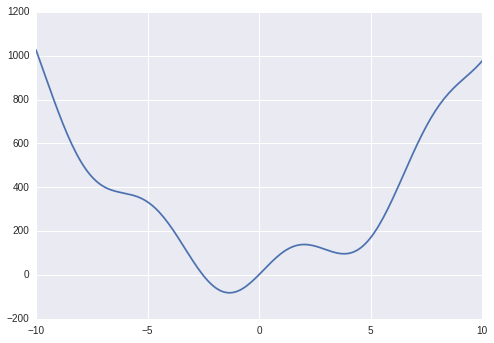

In [2]:
def f(x):
    return 10*x**2+ 3*x + 2 + 100*numpy.sin(x)

left = -10
right = 10

X = numpy.linspace(left, right, 200)
pylab.plot(X, f(X))
plt.show()

Поиск экстремума осуществляеся тремя различными алгоритмами:
1. Метод половинного деления
2. Метод золотого сечения
3. Метод Фибоначчи

In [3]:
def BinarySearch(left, right, eps = 0.000001):
    steps_count = 0
    while right - left > eps:
        steps_count += 1
        m1 = left + (right - left) / 3.0
        m2 = right - (right - left) / 3.0
        if (f(m1) < f(m2)): 
            right = m2
        else:
            left = m1
    return (f((right+left) / 2.0), (right+left) / 2.0, steps_count)

def GoldenSection(left, right, eps = 0.000001):
     x = left + (right - left) * (3 - sqrt(5)) / 2.0
     y = left + right - x
     steps_count = 0
     while right - left > eps:
        steps_count += 1
        if f(x) < f(y):
            right = y
            y = x
            x = left + right - y
        else:
            left = x
            x = y
            y = left + right - x
     return (f((right+left) / 2.0), (right+left) / 2.0, steps_count)

def FibonachiSection(left, right, eps = 0.000001):
    def fib(n):
        if n < 3:
            return 1.
        return fib(n-1) + fib(n-2)
    steps_count = 0
    while right - left > eps:
       steps_count += 1
       x = left + fib(steps_count+2)/fib(steps_count+3) * (right - left)
       y = left + right - x
       if f(x) > f(y):
           right = y
       else:
           left = x
    return (f((right+left) / 2.0), (right+left) / 2.0, steps_count)    

В каждом методе реализован подсчет количества шагов, за которые был вычислен ответ. 

Результат вычислений $-$ тройка чисел:
1. Значение функции в найденной точке экстремума
2. Точка экстремума
3. Количество шагов алгоритма

In [4]:
print BinarySearch(-10, 1)
print GoldenSection(-10, 1)
print FibonachiSection(-10, 1)

(-81.416099499463229, -1.33211364371233, 40)
(-81.416099499463456, -1.3321138495346263, 34)
(-81.416099497883579, -1.3321085623258488, 17)


In [5]:
print BinarySearch(3.7, 400)
print GoldenSection(3.7, 400)
print FibonachiSection(3.7, 400)

(96.614153253751624, 3.801191327765406, 49)
(96.614153254099818, 3.8011883535655411, 40)
(96.61415325716473, 3.8012004453209656, 21)


#### Методы многомерного поиска.

Требуется найти безусловный минимум функции $f(x)$ многих переменных, используя методы одномерного поиска для определения величины шага в направлении поиска $d^k$
$$
\alpha^{*k} = Arg \ min \ f(x^k+\alpha^kd^k)
$$

В качестве $f(x)$ рассматривается функция Розенброка:
$$
f(x) = \sum\limits_{i=1}^{n-1} [a(x_i^2-x_{i+1})^2+b(x_i-1)^2] + f_0
$$
с коэффициентами
$$
a = 150
$$
$$
b = 2
$$
$$
f_0 = 110
$$
$$
n = 3
$$

* Метод конфигураций (метод Хука – Дживса). 

In [36]:
from scipy.optimize import minimize_scalar

def f(x, a=150, b=2, f0=110):
    return sum([a * (x[i] ** 2 - x[i + 1]) ** 2 + b * (x[i] - 1) ** 2 for i in range(0, len(x) - 1)]) + f0

def get_step_point(x, h, i):
    x = copy(x)
    x[i] += h
    return x

def exploring_search(f, x0, e=1e-5):
    def f_opt(h):
        return f(get_step_point(x, h, i))
    x = x0
    while True:
        for i in range(len(x)):
            xp = x
            x = get_step_point(x, minimize_scalar(f_opt).x, i)
        if sum(x - xp) * 1.0 / len(x) < e:
            break
    return x

def pattern_search(f, x0, e=1e-3, l=2.0):
    step = 0
    while True:
        step += 1
        x1 = x0
        x2 = exploring_search(f, x0)
        x3 = x1 + l * (x2 - x1)
        x4 = exploring_search(f, x3)
        if np.linalg.norm((x2 - x4)) / len(x0) < e:
            break
        else:
            x0 = x2
    return x2, f(x2), step


Задаем начальные параметры, точку первого приблежения

In [187]:
n = 3
scale = 100

start_point = [39.33561727, 38.77636387, 1.55366036]
print f(start_point), start_point

679772630.254 [39.33561727, 38.77636387, 1.55366036]


Метод требует большого количества шагов для получения результата

In [188]:
print pattern_search(f, x0=start_point)

(array([ 1.11617763,  1.24599535,  1.55250441]), 110.14802496841133, 1891)


* Метод наискорейшего градиентного спуска.

Этот вариант градиентного метода основывается на выборе шага из следующего соображения. Из точки $x^{[k]}$ будем двигаться в направлении антиградиента до тех пор пока не достигнем минимума функции $f$ на этом направлении, т. е. на луче
$$
L=[x=x^{[k]}-\lambda f'(x^{[k]});\; \lambda \leq 0] :
    \lambda^{[k]} = \arg\min_{ \lambda\in [0, \infty)} f(x^{[k]}-\lambda f'(x^{[k]})). 
$$
Другими словами, $\lambda^{[k]}$ выбирается так, чтобы следующая итерация была точкой минимума функции $f$ на луче L.       


In [189]:
from scipy.optimize import minimize_scalar

def f(x, a = 150, b = 2, f0 = 110):
    return sum([a*(x[i]**2 - x[i+1])**2 + b*(x[i] - 1)**2 for i in range(0, len(x)-1)]) + f0

def Grad(x, a = 150, b = 2):
    return np.array([4*a*x[0]*(x[0]**2-x[1]) + 2*b*(x[0]-1), 
                     4*a*x[1]*(x[1]**2-x[2]) + 2*b*(x[1]-1) - 2*a*(x[0]**2-x[1]), 
                     -2*a*(x[1]**2-x[2])])

def GradSearch(x, nm ='Bounded', eps = 0.0005, max_step = 100, steps = 0):
    result = minimize_scalar(lambda alpha: f(x - alpha*Grad(x)), bounds = (-max_step, max_step), method = nm)
    new_x = x - result.x*Grad(x)
    print x, f(x), f(new_x)
    if f(x) - f(new_x) < eps:
        return (f(x), x, steps)
    return GradSearch(new_x, nm, steps = steps + 1)

В качестве методов одномерной оптимизации использовались: метод деления отрезка пополам и метод золотого сечения.

Ниже представлены результаты тестирования. 

Метод золотого сечения дает более точный результат за меньшее число шагов, по сравнению с методом половинного деления.

In [190]:
print GradSearch(start_point, nm = 'Bounded')

[39.33561727, 38.77636387, 1.55366036] 679772630.254 134169041.003
[ 26.20118987  26.0510885    1.71989787] 134169041.003 26395037.7771
[ 17.57422135  17.42403501   1.8886355 ] 26395037.7771 275.536226465
[ 1.57274457  1.45498828  2.35993704] 275.536226465 119.446673082
[ 1.3088734   1.59626789  2.33997509] 119.446673082 111.931937799
[ 1.27357101  1.53303441  2.36366631] 111.931937799 110.869945559
[ 1.24950767  1.54590655  2.36225815] 110.869945559 110.720351221
[ 1.2445761   1.53678621  2.36551706] 110.720351221 110.697253033
[ 1.2409406   1.53859618  2.36510519] 110.697253033 110.693510392
[ 1.24014191  1.53706396  2.3653709 ] 110.693510392 110.692730864
[ 1.23948089  1.53735151  2.36502778]

 110.692730864 110.692355729
(110.69273086413823, array([ 1.23948089,  1.53735151,  2.36502778]), 10)


In [191]:
print GradSearch(start_point, nm = 'Golden')

[39.33561727, 38.77636387, 1.55366036] 679772630.254 203.527135962
[ 0.85510857  1.49456586  2.04069369] 203.527135962 136.769343076
[ 1.01905824  1.32566088  2.06489968] 136.769343076 113.573483634
[ 1.14081606  1.43467471  2.00089998] 113.573483634 110.727418531
[ 1.17149259  1.40383376  2.00672841] 110.727418531 110.43872681
[ 1.18450458  1.4155368   2.00016917] 110.43872681 110.415726923
[ 1.18720376  1.41273517  2.00052503]

 110.415726923 110.4137101
[ 1.18821374  1.41359431  1.99962816] 110.4137101 110.413392056
(110.41371009980688, array([ 1.18821374,  1.41359431,  1.99962816]), 7)
